# Titanic Survival prediction:

# Importing Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [5]:
#Checking the total null value count  for further data Cleaning process:

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 1. Data cleaning

In [6]:
#Fillinng the Age coulmn null value data:

df['Age'].fillna(df['Age'].mean(),inplace = True)

In [7]:
#Filling the Fare coulmn null value data:

df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [8]:
#Checking the NaaN value count after filling

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
#Drop the cabin coulmn since we have nothing to deal with it:

df.drop(['Cabin'],axis='columns',inplace=True)

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [11]:
df1 = df[['Pclass', 'Sex']]
city_tel_ct = df1.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)
city_tel_ct

Sex,female,male
Pclass,,
1,50,57
2,30,63
3,72,146


# 2. Exploratory data analytics:

Exploring some of the data through visuals and graphs which may be used to get some of the valueable insights. 

<Axes: xlabel='Survived', ylabel='count'>

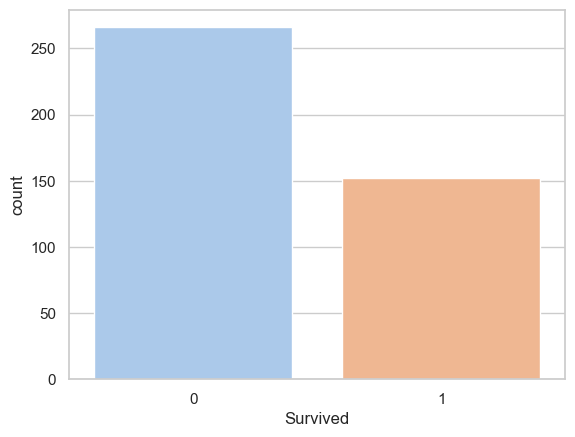

In [12]:
sns.set(style="whitegrid",palette='pastel')
sns.countplot(x = 'Survived',data = df)

Insight : Most of the people in the ship did not survived.

<Axes: xlabel='Embarked', ylabel='count'>

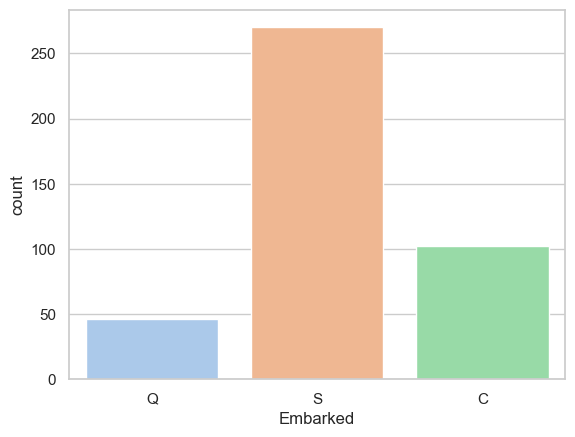

In [13]:
sns.set(style="whitegrid",palette='pastel')
sns.countplot(x = df['Embarked'])

Here S : Southampton and Q : Queenstown and C Stands for : Cherbourg
            
insight : Most of the people boarded the ship from Southampton Point so most of the people are from Southampton

<Axes: xlabel='Sex', ylabel='count'>

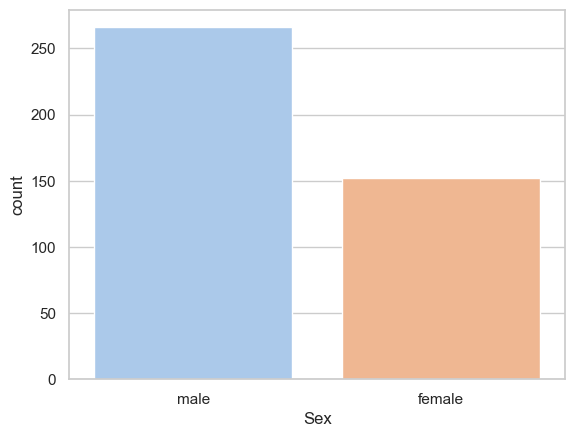

In [14]:
sns.set(style="whitegrid",palette='pastel')
sns.countplot(x = 'Sex',data = df)

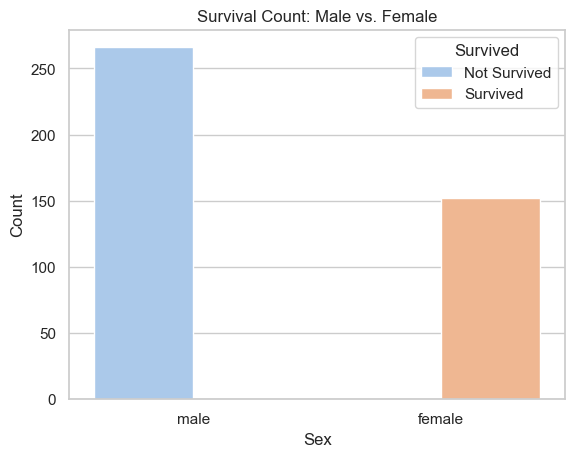

In [15]:
sns.set(style="whitegrid")
#plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')

# Add labels and title
plt.title('Survival Count: Male vs. Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Display the plot
plt.show()

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

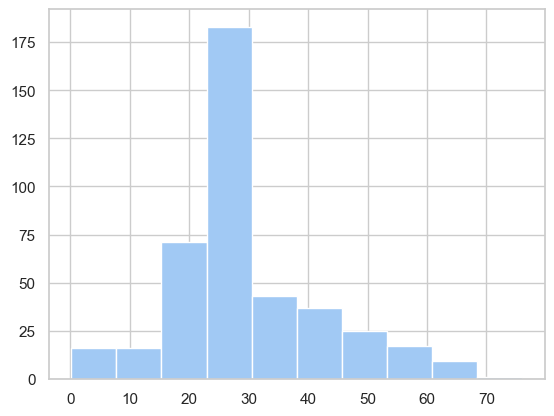

In [16]:
sns.set(style="whitegrid",palette='pastel')
plt.hist(df['Age'])

C:\Users\abhil\AppData\Local\Temp\ipykernel_20820\649649539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived']==0])
C:\Users\abhil\AppData\Local\Temp\ipykernel_20820\649649539.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

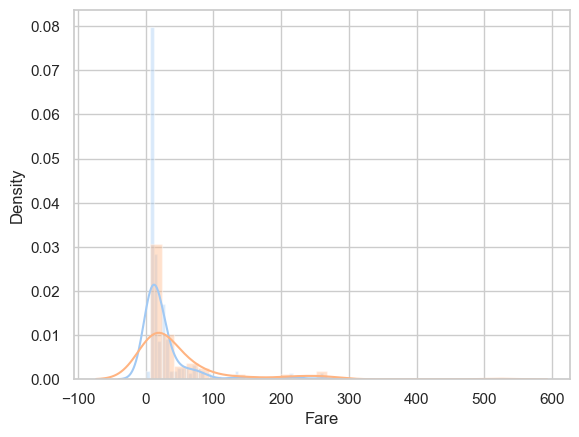

In [17]:
sns.set(style="whitegrid",palette='pastel')
sns.distplot(df['Fare'][df['Survived']==0])
sns.distplot(df['Fare'][df['Survived']==1])

C:\Users\abhil\AppData\Local\Temp\ipykernel_20820\2249283261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'][df['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

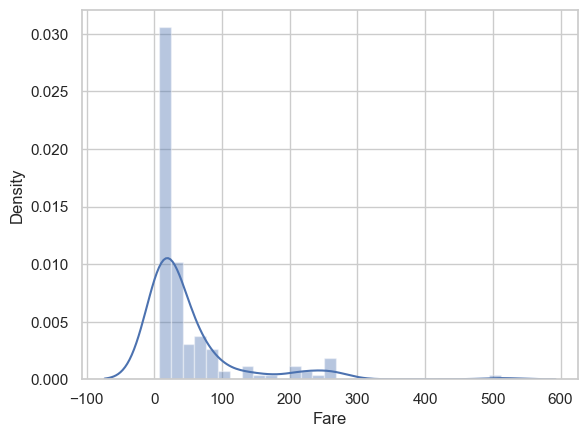

In [18]:
sns.set(style="whitegrid")
sns.distplot(df['Fare'][df['Survived']==1])

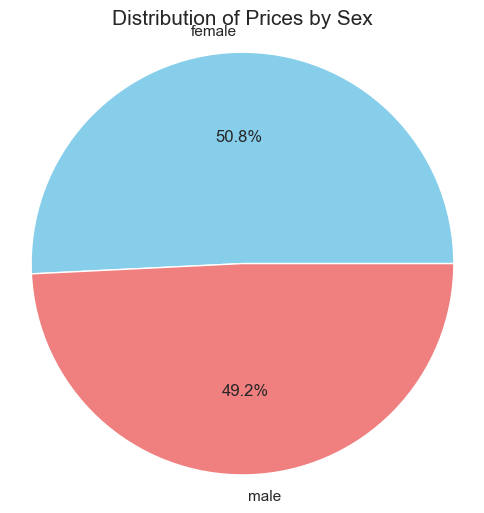

In [19]:
# Calculate the total price for each sex
total_price_by_sex = df.groupby('Sex')['Fare'].sum()

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(total_price_by_sex, labels=total_price_by_sex.index, autopct='%1.1f%%', pctdistance=0.6, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Prices by Sex',size = '15')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

# 3. Text preprocessing:

For prediction we need Age, Gender, Passenger Class and Fare of the ticket. 
So we will create another dataframe and add these variables as dependent variables and 
the Status of survival with Independent variables like y

In [20]:
#Creating another dataframe named as dm 

dm = df

In [21]:
# Removing other columns:

dm.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'],axis = 'columns',inplace = True)
dm

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.50000,7.8292
1,1,3,female,47.00000,7.0000
2,0,2,male,62.00000,9.6875
3,0,3,male,27.00000,8.6625
4,1,3,female,22.00000,12.2875
...,...,...,...,...,...
413,0,3,male,30.27259,8.0500
414,1,1,female,39.00000,108.9000
415,0,3,male,38.50000,7.2500
416,0,3,male,30.27259,8.0500


In [22]:
target = df['Survived']

In [23]:
dm.drop(['Survived'],axis = 'columns',inplace = True)
dm

,Pclass,Sex,Age,Fare
0,3,male,34.50000,7.8292
1,3,female,47.00000,7.0000
2,2,male,62.00000,9.6875
3,3,male,27.00000,8.6625
4,3,female,22.00000,12.2875
...,...,...,...,...
413,3,male,30.27259,8.0500
414,1,female,39.00000,108.9000
415,3,male,38.50000,7.2500
416,3,male,30.27259,8.0500


Here the gender is in the string format so we need to use label encoder to convert it into Int format:

In [24]:
#Importing the Label Encoder model

from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()

In [25]:
dm['gender'] = le_gender.fit_transform(dm['Sex'])

In [26]:
# Here for male the code is 1 and for female code is 0

dm.drop(['Sex','Fare'],axis = 'columns',inplace = True)
dm

,Pclass,Age,gender
0,3,34.50000,1
1,3,47.00000,0
2,2,62.00000,1
3,3,27.00000,1
4,3,22.00000,0
...,...,...,...
413,3,30.27259,1
414,1,39.00000,0
415,3,38.50000,1
416,3,30.27259,1


In [27]:
target

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

Here dm contains the x dataframe and target contains the dependent varialbe which is required to build the model.

# 4. Model building:

Train and Test splitting:

In [28]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(dm,target,test_size=0.25,random_state=2)

In [29]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(x_train,y_train)

In [30]:
from sklearn.model_selection import train_test_split
#classify funtion which is defined by us to cheack the accuracy
def function_model(model):
    model.fit(x_train,y_train)
    print("Accuracy: ",model.score(x_test,y_test))

In [31]:
#Logistic regression model testing:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
function_model(model)

Accuracy:  1.0


In [32]:
#Decession Tree model testing:

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
function_model(model)

Accuracy:  1.0


In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
function_model(model)

Accuracy:  1.0


C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.